<a href="https://colab.research.google.com/github/sachinbb7/Machine-Learning-Projects/blob/main/All_codes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# !gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

!gdown 1Uf8npawLbGPDBu9HBfNcvzhf_PdL9RhX



df= pd.read_csv("cars24-car-price-clean-new.csv")


x= df.drop(columns= "selling_price")
y= df["selling_price"]


from sklearn.model_selection import train_test_split
x_train,x_test, y_train , y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)


from sklearn.linear_model import LinearRegression

x_train.columns

Downloading...
From: https://drive.google.com/uc?id=1Uf8npawLbGPDBu9HBfNcvzhf_PdL9RhX
To: /content/cars24-car-price-clean-new.csv
100% 6.57M/6.57M [00:00<00:00, 36.1MB/s]


Index(['km_driven', 'mileage', 'engine', 'max_power', 'age', 'make', 'model',
       'Individual', 'Trustmark Dealer', 'Diesel', 'Electric', 'LPG', 'Petrol',
       'Manual', '5', '>5'],
      dtype='object')

In [5]:
#Defining Metrics for model performance

class linear_regression():

    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train


    def predict(self, x_test):
        model = LinearRegression().fit(self.x_train, self.y_train)
        y_predict = model.predict(x_test)
        return y_predict

    def mse(self, y_test, x_test):
        mse = (np.sum((y_test - self.predict(x_test))**2)) / len(self.predict(x_test))
        return mse

    def r_square(self, y_test, x_test):
        numerator = (np.sum((y_test - self.predict(x_test))**2))
        denominator = (np.sum((y_test - np.mean(y_test))**2))
        r_score = 1 - numerator / denominator
        return r_score

    def adjusted_rscore(self, y_test, x_test):

      d= x_test.shape[1]
      n= len(x_test)
      score = 1- (self.r_square(y_test, x_test)) * (n-1)/ (n-d-1)
      adjusted_rscore = 1- score
      return adjusted_rscore


In [11]:
#Linear Regression code

def linear_code(x_train, y_train, n = 0.01):

  store_mse = [] #stroing my loss values

  #intializing w-vector and bias with value 0
  w= np.zeros(x_train.shape[1])
  w0 = np.zeros(1)

  for i in range(500):

    #doing pure matrix multiplication here
    y_predicted = (np.dot(x_train, w)) + w0 #x_train dimension = (n,d) , w dimensoon = (d,1). ----->>>> matrix multiplication of (n,d), (d,1) = (n,1)
    mse = (np.sum((y_train- y_predicted)**2)/(len(x_train)))/len(x_train)
    store_mse.append(mse)

    #finding w-vector and bias gradients
    w_gradient = -(np.dot(x_train.T, (y_train - y_predicted)))* (2/len(x_train))
    w0_gradient = -(y_train - y_predicted) * (2/len(x_train))

    #updating weights
    w = w - (n * w_gradient)
    w0= w0 - (n* w0_gradient)


  return store_mse , w , w0


mse, w , w0 = linear_code(x_train, y_train)

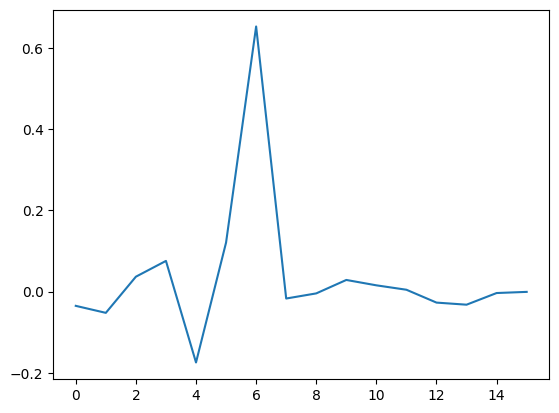

In [12]:
#Feature Importance
plt.plot(w)

In [13]:
#Linear Regression code with L1 & L2 Regularization

def linear_code(x_train, y_train, n = 0.01, alpha = 0.1 , beta= 0.1):

  store_loss = [] #stroing my loss values

  #intializing w-vector and bias with value 0
  w= np.zeros(x_train.shape[1])
  w0 = np.zeros(1)

  for i in range(1000):

    #doing pure matrix multiplication here

    y_predicted = (np.dot(x_train, w)) + w0 #x_train dimension = (n,d) , w dimensoon = (d,1). ----->>>> matrix multiplication of (n,d), (d,1) = (n,1)
    loss = (1/len(y_train)) * np.sum(y_train - y_predicted)**2 #matrix subtraction of (n,1) - (n,1) = (n,1)
    modified_loss = loss + (beta *np.sum((w)**2)) + (alpha * np.sum(np.absolute(w))) #adding L2 & L1 Regularization ----->>> (n,1) + (1) + (1) = (n,1)
    store_loss.append(loss)

    #finding w-vector and bias gradients
    #matrix multiplication x_train.T , error ----->>>> (d,n) , (n,1) = (d,1)
    w_gradient = (-(np.dot(x_train.T, (y_train - y_predicted)))* (2/len(x_train))) + (2*beta*w) + (alpha * np.sign(w))
    w0_gradient = -(y_train - y_predicted) * (2/len(x_train))

    #updating weights
    w = w - (n * w_gradient)
    w0= w0 - (n* w0_gradient)


  return store_loss , w , w0 , y_predicted


mse, w , w0 , y_pred = linear_code(x_train, y_train)

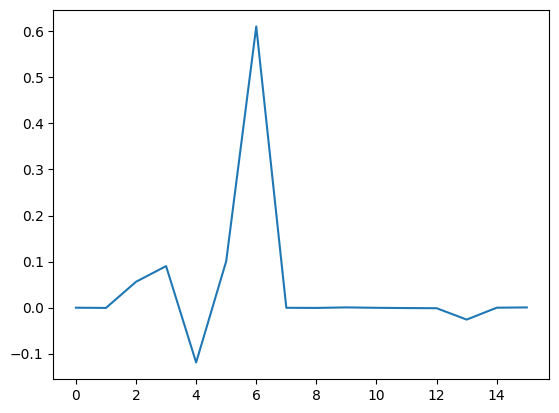

In [9]:
#Feature Importance with lasso & Ridge regularization
plt.plot(w)

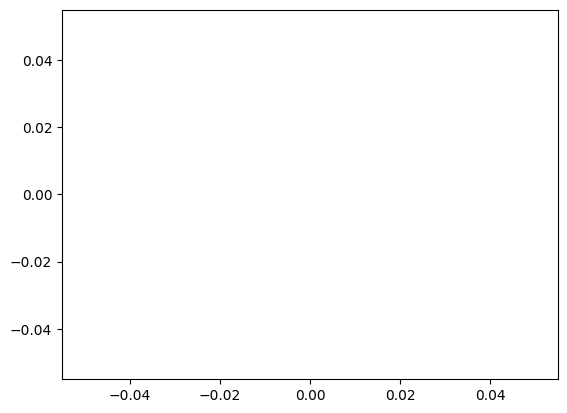

In [18]:
plt.plot(y_test- y_pred)
plt.show()